## Processing ZTF alerts using alerce

### Import python libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import io
import gzip
import tarfile
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm

from alerce.core import Alerce
alerce = Alerce()

from astropy.time import Time
from astropy.io import fits
import astropy.units as u
import aplpy
%matplotlib inline

### Get time-series images of ZTF objects using their unique identifiers

In [2]:
ZTF_transient_list = np.load("data/ZTF_selection.npz")['transient_selection_list'].tolist()

In [166]:
def makeTimeSeries(batch):
    pbar = tqdm(total=len(batch))
    ztf_ID = []
    ztf_time_series_images = []
    time = []
    time_bis = []
    ra = []
    ra_bis = []
    dec = []
    dec_bis = []

    for ztf in batch:    

        r_band = False
        detections = alerce.query_detections(ztf, format="json")   # to get access to detected transients 
                                                              # to get the lightcurve of the transient 'ztf'
        
        transient_candid = []

        for i in range(len(detections)):
            if detections[i]['fid'] == 2:                         # r-band  Filter ID (1=g; 2=r; 3=i)
                #print(detections)
                r_band = True
                transient_candid.append(detections[i]['candid'])
                ra_bis.append(detections[i]['ra'])
                dec_bis.append(detections[i]['dec'])
                time_bis.append(detections[i]['mjd'])

        transient_time_series_images = []
        for k in transient_candid:
            hdul = alerce.get_stamps(oid = ztf, candid = k)     # oid: ZTF Object ID
            if hdul is not None:
                transient_time_series_images.append(np.nan_to_num(hdul[2].data[7:55,7:55]))
                
        if r_band:
            ztf_ID.append(ztf)
            ztf_time_series_images.append(transient_time_series_images)
            ra.append(ra_bis)
            dec.append(dec_bis)
            time.append(time_bis)
            
        ra_bis = []
        dec_bis = []
        time_bis = []
        
        pbar.update(1)
    return ztf_ID, ztf_time_series_images, time, ra, dec

In [ ]:
def makeFiles(data, batch):
    
    n = len(data)
    index=1
    start = 0
    
    while index <= n//batch:
        
            
        time = makeTimeSeries(data[start:index*batch])
        #path = os.path.join("/ZTF_sims/data/ZTF_data/", "ZTF_data_{}.npz".format(index))
        np.savez("ZTF_data_{}.npz".format(index), ztf_ID=time[0], ztf_time_series_images=time[1])
        index+=1
        start = index*50
        
    if n%batch != 0:
        time = makeTimeSeries(data[(index-1)*batch:])
        #path = os.path.join("/ZTF_sims/data/ZTF_data/", "ZTF_data_{}.npz".format(index))
        np.savez("ZTF_data_{}.npz".format(index), ztf_ID=time[0], ztf_time_series_images=time[1])
    

In [167]:
data = ZTF_transient_list[350:351]

import socket
socket.setdefaulttimeout(100000)
sock = socket.socket()
sock.timeout

100000.0

In [168]:
TS = makeTimeSeries(data)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

[{'tid': 'ztf', 'mjd': 59390.45430559991, 'candid': '1636454304015015008', 'fid': 1, 'pid': 1636454304015, 'diffmaglim': 19.6371, 'isdiffpos': 1, 'nid': 1636, 'distnr': 0.940967, 'magpsf': 20.0388, 'magpsf_corr': 19.304665, 'magap': 19.4562, 'sigmapsf': 0.289683, 'sigmapsf_corr': 0.1462565, 'sigmapsf_corr_ext': 0.14732264, 'sigmagap': 0.3406, 'ra': 2.6475092, 'dec': 41.8349742, 'rb': 0.37, 'rbversion': 't17_f5_c3', 'magapbig': 19.0438, 'sigmagapbig': 0.2993, 'has_stamp': False, 'corrected': True, 'dubious': False, 'step_id_corr': 'correction_0.0.1', 'phase': 0.0}, {'tid': 'ztf', 'mjd': 59393.449479199946, 'candid': '1639449474015015020', 'fid': 2, 'pid': 1639449474015, 'diffmaglim': 20.274, 'isdiffpos': 1, 'nid': 1639, 'distnr': 0.229176, 'magpsf': 20.3876, 'magpsf_corr': 19.32019, 'magap': 20.3429, 'sigmapsf': 0.269586, 'sigmapsf_corr': 0.09845603, 'sigmapsf_corr_ext': 0.10086338, 'sigmagap': 0.4534, 'ra': 2.6474274, 'dec': 41.8351522, 'rb': 0.771429, 'rbversion': 't17_f5_c3', 'magapb

100%|█████████████████████████████████████████████| 1/1 [00:17<00:00, 17.07s/it]


In [148]:
len(TS[1][0])

23

In [157]:
TS[3]

[[2.6474274,
  2.6472434,
  2.6472754,
  2.6472784,
  2.6472815,
  2.6473592,
  2.6472722,
  2.6473757,
  2.6472672,
  2.6473599,
  2.6472777,
  2.647306,
  2.6473112,
  2.6472927,
  2.6472973,
  2.6473454,
  2.6473037,
  2.6472934,
  2.6473944,
  2.647313,
  2.6473409,
  2.6473352,
  2.6473001,
  2.6473477,
  2.6473126,
  2.6474701,
  2.6473344,
  2.6473571,
  2.6472859,
  2.6473661,
  2.6473956,
  2.6473359,
  2.6475111,
  2.6472358,
  2.6474563,
  2.6472939,
  2.6474903,
  2.6472069,
  2.6473866,
  2.6473568]]

In [158]:
len(TS[3][0])

40

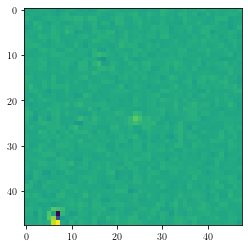

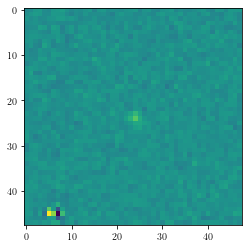

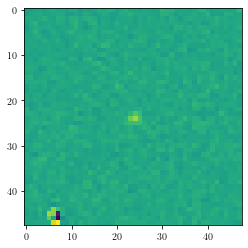

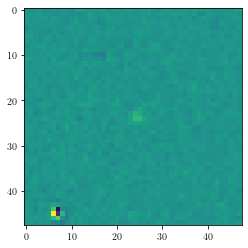

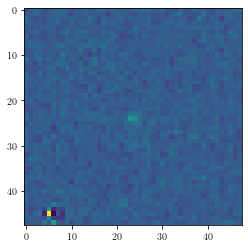

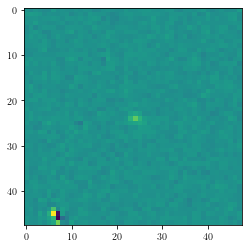

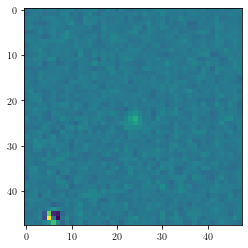

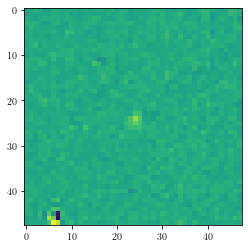

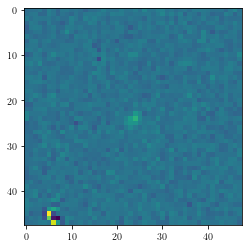

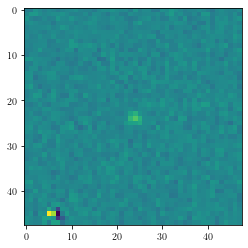

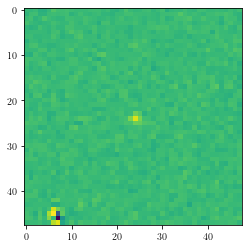

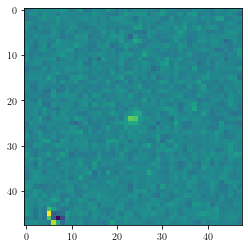

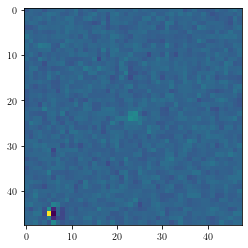

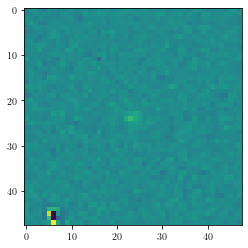

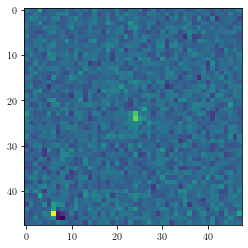

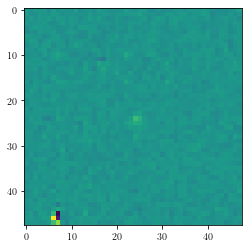

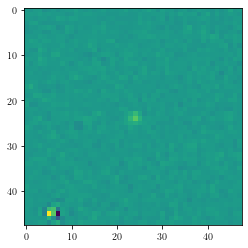

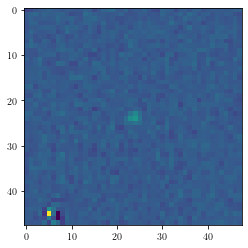

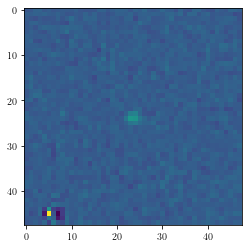

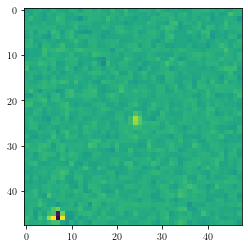

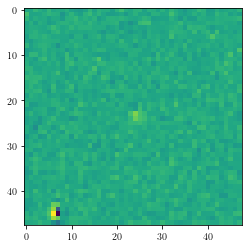

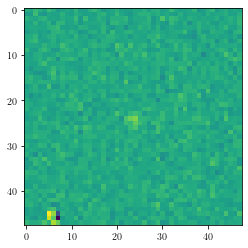

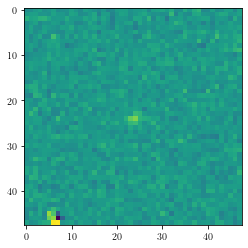

In [154]:
for i in range(len(TS[1][0])):
    plt.imshow(TS[1][0][i])
    plt.show();

In [6]:
np.savez("ZTF_data_test.npz", ztf_ID=TS[0], ztf_time_series_images=TS[1], time=TS[2], ra=TS[3], dec=TS[4])

In [7]:
np.savez("ZTF_data_test.fits", ztf_ID=TS[0], ztf_time_series_images=TS[1], time=TS[2], ra=TS[3], dec=TS[4])

In [8]:
from astropy.table import Table

In [19]:
data[0]

'ZTF20abwypeg'

In [17]:
ZTF_transient_list[350:351]

['ZTF20abwypeg']

In [173]:
detections = alerce.query_detections(data[0], format="votable")

In [176]:
detections.info()

<Table length=72>
       name        dtype     class     n_bad
----------------- ------- ------------ -----
           candid   str19       Column     0
        corrected    bool       Column     0
              dec float64       Column     0
       diffmaglim float64       Column     0
           distnr float64       Column     0
              drb float64 MaskedColumn    35
          dubious    bool       Column     0
              fid   int64       Column     0
        has_stamp    bool       Column     0
        isdiffpos   int64       Column     0
            magap float64       Column     0
         magapbig float64       Column     0
           magpsf float64       Column     0
      magpsf_corr float64       Column     0
              mjd float64       Column     0
              nid   int64       Column     0
    parent_candid   int64 MaskedColumn    44
            phase float64       Column     0
              pid   int64       Column     0
               ra float64       Colum

In [101]:
detections.info()

<Table length=72>
       name        dtype     class     n_bad
----------------- ------- ------------ -----
           candid   str19       Column     0
        corrected    bool       Column     0
              dec float64       Column     0
       diffmaglim float64       Column     0
           distnr float64       Column     0
              drb float64 MaskedColumn    35
          dubious    bool       Column     0
              fid   int64       Column     0
        has_stamp    bool       Column     0
        isdiffpos   int64       Column     0
            magap float64       Column     0
         magapbig float64       Column     0
           magpsf float64       Column     0
      magpsf_corr float64       Column     0
              mjd float64       Column     0
              nid   int64       Column     0
    parent_candid   int64 MaskedColumn    44
            phase float64       Column     0
              pid   int64       Column     0
               ra float64       Colum

In [104]:
D.header

AttributeError: 'NoneType' object has no attribute 'header'

In [103]:
Dh = WCS(D.header)

AttributeError: 'NoneType' object has no attribute 'header'

In [99]:
D = detections.write('D.xml', format='votable')

In [93]:
from astropy.io import fits
from astropy.wcs import WCS

In [95]:
w = WCS(header)

In [96]:
px, py = w.wcs_world2pix(0., 0., 1)

In [97]:
print('{0} {1}'.format(px, py))

0.0 0.0


In [105]:
hdul = alerce.get_stamps(oid = data[0], candid = 1657452614015015012)

In [175]:
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9cf83604c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f9cd994e790>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f9cd994e730>]

In [115]:
H = hdul[2].header

In [112]:
wcs = WCS(H)

In [113]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 63  63

In [116]:
hdr = hdul[2].data

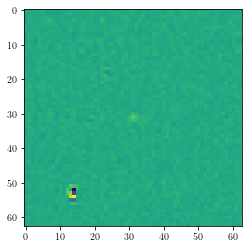

In [119]:
plt.imshow(hdr);

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (63, 63)   float32   
  1                1 ImageHDU         9   (63, 63)   float32   
  2                1 ImageHDU         9   (63, 63)   float32   


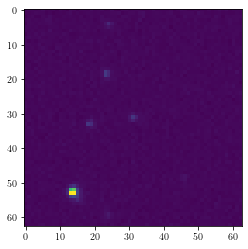

In [128]:
plt.imshow(hdul[0].data)
hdul.info()

In [129]:
wcs = WCS(header=hdul[0].header)
image = hdul[0].data

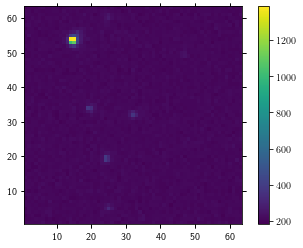

In [130]:
ax = plt.subplot(projection=wcs)
im = ax.imshow(image)
plt.colorbar(im)

In [131]:
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9cf83604c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f9cd994e790>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f9cd994e730>]